In [56]:
import pandas as pd
from transformers import pipeline

import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Charger le jeu de données nettoyé
file_path = "tmdb_all_reviews_simplified.csv"
df = pd.read_csv(file_path)


# Charger le pipeline de sentiment de BERT pré-entraîné
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Fonction pour prédire les sentiments avec BERT
def predict_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])  # BERT limite les textes à 512 tokens
        label = result[0]["label"]  # Exemple : "5 stars", "1 star"
        if "1" in label or "2" in label:
            return "négatif"
        elif "4" in label or "5" in label:
            return "positif"
        else:
            return "neutre"
    except Exception as e:
        return "neutre"  # En cas d'erreur, classer comme neutre

# Appliquer le modèle sur les critiques nettoyées
df["sentiment_bert"] = df["content"].apply(lambda x: predict_sentiment(str(x)))

# Afficher un aperçu des résultats
print(df[["content", "sentiment_bert"]].head())

# Sauvegarder les résultats dans un nouveau fichier CSV
df.to_csv("tmdb_sentiment_analysis_bert.csv", index=False, encoding="utf-8")
print("Analyse des sentiments avec BERT terminée. Résultats sauvegardés dans 'tmdb_sentiment_analysis_bert.csv'.")

Device set to use cpu


                                             content sentiment_bert
0  Introduction Venom: The Last Dance est une agr...        positif
1  The Substance est un film dhorreur corporelle ...         neutre
2  Damien Leone, le réalisateur de Terrifier 3 re...        positif
3  Le Z de World War Z et dApocalypse Z semble êt...         neutre
4  Lhorreur et lhumour sinistre des films Alien s...        négatif
Analyse des sentiments avec BERT terminée. Résultats sauvegardés dans 'tmdb_sentiment_analysis_bert.csv'.


C:\Users\Dell\AppData\Local\Temp\ipykernel_3372\848876132.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


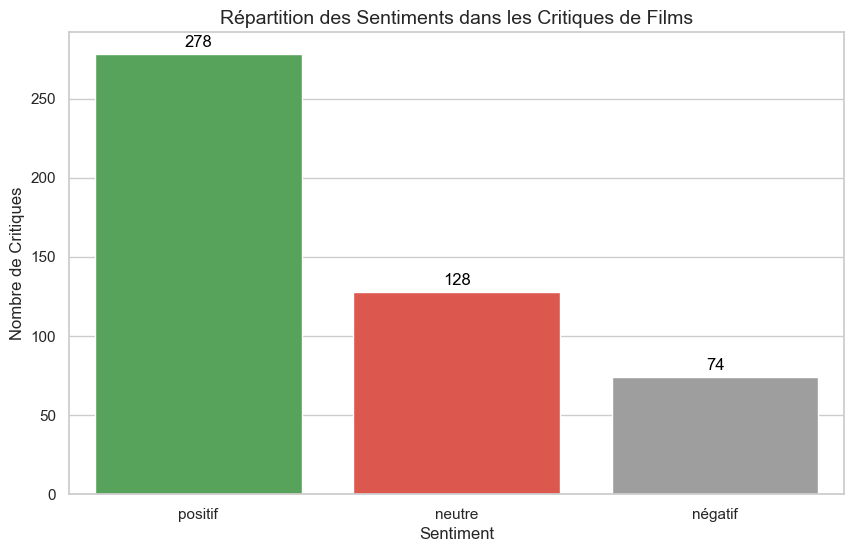

In [60]:
#affichage plus avancé du graphe toujours avec matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données après l'analyse des sentiments
file_path = "tmdb_sentiment_analysis_bert.csv"
df = pd.read_csv(file_path)

# Compter le nombre de critiques par sentiment
sentiment_counts = df["sentiment_bert"].value_counts().sort_values(ascending=False)

# Initialiser le style de Seaborn
sns.set(style="whitegrid")  # Style propre avec fond blanc

# Créer la visualisation
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=["#4CAF50", "#F44336", "#9E9E9E"]  # Vert, Rouge, Gris pour les sentiments
)

# Ajouter des étiquettes de valeur sur chaque barre
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="baseline", fontsize=12, color="black", xytext=(0, 5),
                textcoords="offset points")

# Ajouter des titres et labels
plt.title("Répartition des Sentiments dans les Critiques de Films", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Nombre de Critiques", fontsize=12)

# Afficher le graphique
plt.show()